## data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle
import plotly.express as px

df = pd.read_csv("/content/drive/MyDrive/PRML/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")
df.head
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [ ]:
for i in range(df.shape[0]):
  if df['Volume'][i] == '-':
    df.drop(i, axis=0, inplace = True)

In [ ]:
df = df.loc[::-1].set_index(df.index)

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(df, x=df.Date, y=[df['Open'], df['Close'], 
                                          df['High'], df['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
df.drop(columns = ["Date"], axis=1, inplace=True)

In [ ]:
init = list(df['Volume'])
fin = []
for x in init :
  fin.append(float(x.replace(',','')))
df["Volume"] = fin 
init = list(df['Market Cap'])
fin = []
for x in init :
  fin.append(float(x.replace(',','')))  
df["Market Cap"] = fin   

## train_val split (70:30)

In [ ]:
df

,Open,High,Low,Close,Volume,Market Cap
0,763.28,777.51,713.60,735.07,4.686270e+07,9.295570e+09
1,737.98,747.06,705.35,727.83,3.250580e+07,8.990850e+09
2,728.05,748.61,714.44,745.05,1.901130e+07,8.872600e+09
3,741.35,766.60,740.24,756.13,2.070770e+07,9.037000e+09
4,760.32,760.58,738.17,754.01,2.089730e+07,9.268240e+09
...,...,...,...,...,...,...
1308,2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
1309,2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
1310,2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
1311,2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10


In [ ]:
pred = "Market Cap"
## feel free to change the value of pred to some other variable
import random
def split(f):  
 d={}
 t={}
 for x in f.columns:
  l=[] 
  if x!=pred: 
   for i in range(0, (70*f.shape[0])//100):
     l.append(f[x][i])
   d[x]=l
  else: 
   for i in range(0,  (70*f.shape[0])//100):
     l.append(f[x][i])
   t[x]=l
 y_train=pd.DataFrame(t)
 x_train=pd.DataFrame(d)
 d.clear()
 t.clear()


 for x in f.columns:
  l=[] 
  if x!=pred: 
   for i in range( (70*f.shape[0])//100,  (100*f.shape[0])//100):
     l.append(f[x][i])
   d[x]=l
  else: 
   for i in range((70*f.shape[0])//100,  (100*f.shape[0])//100):
     l.append(f[x][i])
   t[x]=l
 y_test=pd.DataFrame(t)
 x_test=pd.DataFrame(d)
 d.clear()
 t.clear()
 return (x_train, y_train, x_test, y_test)

(x_train, y_train, x_val , y_val)=split(df)
print(x_train, y_train, x_val, y_val)

       Open    High     Low   Close       Volume
0    763.28  777.51  713.60  735.07   46862700.0
1    737.98  747.06  705.35  727.83   32505800.0
2    728.05  748.61  714.44  745.05   19011300.0
3    741.35  766.60  740.24  756.13   20707700.0
4    760.32  760.58  738.17  754.01   20897300.0
..      ...     ...     ...     ...          ...
914  658.10  659.25  637.77  647.00  138385000.0
915  644.12  644.68  628.28  639.89  142456000.0
916  640.59  675.40  636.61  673.34  138980000.0
917  672.51  686.15  669.59  676.30  134431000.0
918  676.73  703.70  676.40  703.70  112354000.0

[919 rows x 5 columns]        Market Cap
0    9.295570e+09
1    8.990850e+09
2    8.872600e+09
3    9.037000e+09
4    9.268240e+09
..            ...
914  1.033680e+10
915  1.011960e+10
916  1.006640e+10
917  1.057060e+10
918  1.063960e+10

[919 rows x 1 columns]         Open     High      Low    Close        Volume
0     704.97   704.97   649.01   658.66  1.295120e+08
1     658.80   683.66   650.51   683.66 

In [ ]:
norm1 = MinMaxScaler()
norm1.fit(x_train)
x_train = norm1.transform(x_train)
x_val = norm1.transform(x_val)

In [ ]:
norm2 = MinMaxScaler()
norm2.fit(y_train)
y_train = norm2.transform(y_train)
y_val = norm2.transform(y_val)

## building the pipeline

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
mod1  = DecisionTreeRegressor(criterion = "squared_error", splitter = "best", max_depth = 7, min_impurity_decrease=1e-10)
mod2  = LinearRegression()
mod3  = xgb.XGBRegressor(learning_rate = 0.1, n_estimators = 400, max_depth = 7)

In [ ]:
pipe1 = Pipeline([
                 ('featureSelector1', SequentialFeatureSelector(mod1, k_features=2, forward=True, floating=False, scoring='r2')),
                 ('regressor',  mod1)])
pipe2 = Pipeline([
                 ('featureSelector2', SequentialFeatureSelector(mod1, k_features=2, forward=True, floating=False, scoring='r2')),
                 ('regressor',  mod2)])
pipe3 = Pipeline([
                 ('featureSelector3', SequentialFeatureSelector(mod1, k_features=2, forward=True, floating=False, scoring='r2')),
                 ('regressor',  mod3)])


In [ ]:
models =["Decision Tree Regressor","Linear Regression", "XGboost Regressor"]
pipelines = [pipe1, pipe2, pipe3]
for x in pipelines:
  x.fit(x_train, y_train)



In [ ]:
for i in range(3):
  print("{} gives a r2 score of :-> {}".format(models[i],r2_score(y_val, pipelines[i].predict(x_val))))


Decision Tree Regressor gives a r2 score of :-> -0.3913369579207504
Linear Regression gives a r2 score of :-> 0.9541304244054231
XGboost Regressor gives a r2 score of :-> -0.4338032389773987


## comparison between different models

### decision tree regressor

In [ ]:
print("mean deviation using squared error using "+ models[2]+ ":->",np.sqrt(mean_squared_error(norm2.inverse_transform(y_val.flatten().reshape(1,-1)),  norm2.inverse_transform(pipe1.predict(x_val).reshape(1,-1)))))
print("mean deviation using absolute error using "+ models[2]+ ":->",mean_absolute_error(norm2.inverse_transform(y_val.flatten().reshape(1,-1)),  norm2.inverse_transform(pipe1.predict(x_val).reshape(1,-1))))

mean deviation using squared error using XGboost Regressor:-> 13555309024.436178
mean deviation using absolute error using XGboost Regressor:-> 8529700798.688637


Text(0.5, 1.0, 'Decision Tree Regressor')

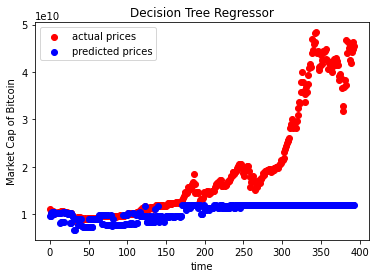

In [ ]:
plt.scatter(list(range(x_val.shape[0])),norm2.inverse_transform(y_val), c="red")
plt.scatter(list(range(x_val.shape[0])),norm2.inverse_transform(pipe1.predict(x_val).reshape(-1,1)), c="blue")
plt.xlabel("time")
plt.ylabel(pred +" of Bitcoin")
plt.legend(["actual prices","predicted prices"], loc = "upper left")
plt.title(models[0])

Text(0.5, 1.0, 'Decision Tree Regressor')

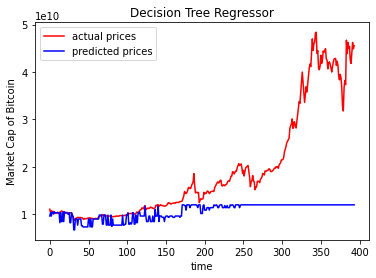

In [ ]:
plt.plot(list(range(x_val.shape[0])),norm2.inverse_transform(y_val), c="red")
plt.plot(list(range(x_val.shape[0])),norm2.inverse_transform(pipe1.predict(x_val).reshape(-1,1)), c="blue")
plt.xlabel("time")
plt.ylabel(pred +" of Bitcoin")
plt.legend(["actual prices","predicted prices"], loc = "upper left")
plt.title(models[0])

### linear regression model

In [ ]:
print("mean deviation using squared error using "+ models[2]+ ":->",np.sqrt(mean_squared_error(norm2.inverse_transform(y_val.flatten().reshape(1,-1)),  norm2.inverse_transform(pipe2.predict(x_val).reshape(1,-1)))))
print("mean deviation using absolute error using "+ models[2]+ ":->",mean_absolute_error(norm2.inverse_transform(y_val.flatten().reshape(1,-1)),  norm2.inverse_transform(pipe2.predict(x_val).reshape(1,-1))))

mean deviation using squared error using XGboost Regressor:-> 2461249398.479156
mean deviation using absolute error using XGboost Regressor:-> 2017216162.184831


Text(0.5, 1.0, 'Linear Regression')

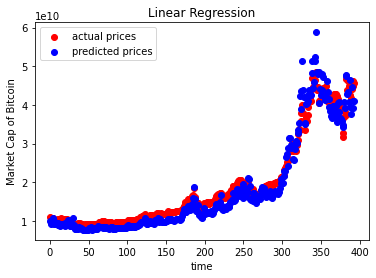

In [ ]:
plt.scatter(list(range(x_val.shape[0])),norm2.inverse_transform(y_val), c="red")
plt.scatter(list(range(x_val.shape[0])),norm2.inverse_transform(pipe2.predict(x_val).reshape(-1,1)), c="blue")
plt.xlabel("time")
plt.ylabel(pred +" of Bitcoin")
plt.legend(["actual prices","predicted prices"], loc = "upper left")
plt.title(models[1])

Text(0.5, 1.0, 'Linear Regression')

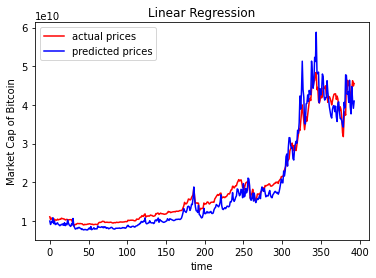

In [ ]:
plt.plot(list(range(x_val.shape[0])),norm2.inverse_transform(y_val), c="red")
plt.plot(list(range(x_val.shape[0])),norm2.inverse_transform(pipe2.predict(x_val).reshape(-1,1)), c="blue")
plt.xlabel("time")
plt.ylabel(pred +" of Bitcoin")
plt.legend(["actual prices","predicted prices"], loc = "upper left")
plt.title(models[1])

### XGboost regressor

In [ ]:
print("mean deviation using squared error using "+ models[2]+ ":->",np.sqrt(mean_squared_error(norm2.inverse_transform(y_val.flatten().reshape(1,-1)),  norm2.inverse_transform(pipe3.predict(x_val).reshape(1,-1)))))
print("mean deviation using absolute error using "+ models[2]+ ":->",mean_absolute_error(norm2.inverse_transform(y_val.flatten().reshape(1,-1)),  norm2.inverse_transform(pipe3.predict(x_val).reshape(1,-1))))

mean deviation using squared error using XGboost Regressor:-> 13760621519.520687
mean deviation using absolute error using XGboost Regressor:-> 8732089943.796955


Text(0.5, 1.0, 'XGboost Regressor')

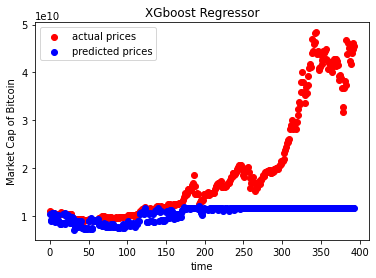

In [ ]:
plt.scatter(list(range(x_val.shape[0])),norm2.inverse_transform(y_val), c="red")
plt.scatter(list(range(x_val.shape[0])),norm2.inverse_transform(pipe3.predict(x_val).reshape(-1,1)), c="blue")
plt.xlabel("time")
plt.ylabel(pred +" of Bitcoin")
plt.legend(["actual prices","predicted prices"], loc = "upper left")
plt.title(models[2])

Text(0.5, 1.0, 'XGboost Regressor')

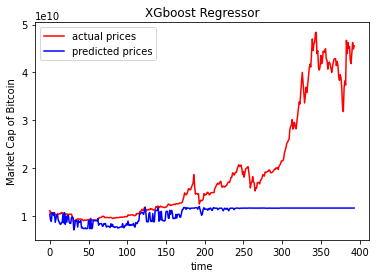

In [ ]:
plt.plot(list(range(x_val.shape[0])),norm2.inverse_transform(y_val), c="red")
plt.plot(list(range(x_val.shape[0])),norm2.inverse_transform(pipe3.predict(x_val).reshape(-1,1)), c="blue")
plt.xlabel("time")
plt.ylabel(pred +" of Bitcoin")
plt.legend(["actual prices","predicted prices"], loc = "upper left")
plt.title(models[2])

## Using LSTM-NN for prediction in immediate future

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
train = np.hstack((x_train,y_train))
val = np.hstack((x_val,y_val))
xtrain, ytrain = create_dataset(train, time_step)
xval, yval = create_dataset(val, time_step)


In [ ]:
xtrain.shape

(903, 15)

In [ ]:
xtrain= xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
xval = xval.reshape(xval.shape[0],xval.shape[1] , 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
lstm=Sequential()
lstm.add(LSTM(10,input_shape=(None,1),activation="relu"))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = lstm.fit(xtrain,ytrain,validation_data=(xval,yval),epochs=350,batch_size=50,verbose=0)

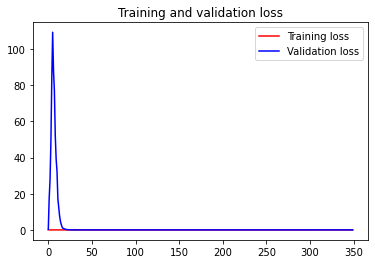

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()



In [ ]:
trainpred=lstm.predict(xtrain)
valpred=lstm.predict(xval)

12/12 [==============================] - 0s 2ms/step


In [ ]:
trainpred = norm2.inverse_transform(trainpred)
valpred = norm2.inverse_transform(valpred)
ytrain = norm2.inverse_transform(ytrain.reshape(-1,1)) 
yval = norm2.inverse_transform(yval.reshape(-1,1))

In [ ]:
print("train data RMSE: ", np.sqrt(mean_squared_error(ytrain,trainpred)))
print("train data MSE: ", mean_squared_error(ytrain,trainpred)) 
print("train data MAE: ", mean_absolute_error(ytrain,trainpred)) 
print("-------------------------------------------------------------------------------------") 
print("val data RMSE: ", np.sqrt(mean_squared_error(yval,valpred))) 
print("val data MSE: ", mean_squared_error(yval,valpred)) 
print("val data MAE: ", mean_absolute_error(yval,valpred))

train data RMSE:  205780631.57213986
train data MSE:  4.234566833022876e+16
train data MAE:  121452815.48327288
-------------------------------------------------------------------------------------
val data RMSE:  1032507810.9096837
val data MSE:  1.0660723795895071e+18
val data MAE:  606624463.8451337


In [ ]:
print("train data r2 score:", r2_score(ytrain, trainpred))
print("val data r2 score:", r2_score(yval, valpred))

train data r2 score: 0.9885581076187847
val data r2 score: 0.985834578183989


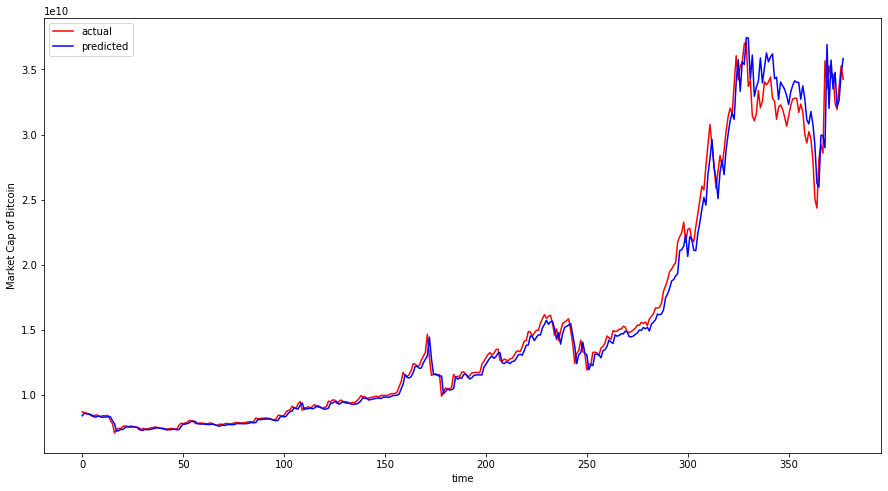

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(list(range(yval.shape[0])),yval, c = "red", label = "actual")
plt.plot(list(range(yval.shape[0])),valpred , c="blue", label = "predicted")
plt.xlabel("time")
plt.ylabel(pred +" of Bitcoin")
plt.legend(loc="best")


## Using Polynomial Regression for curve fitting

In [ ]:
lst=[]
ind = 0
while (ind<df.shape[0]):
  lst.append(ind)
  ind+=1

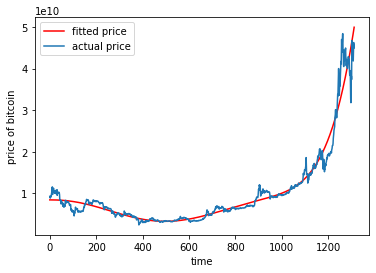

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
crude = PolynomialFeatures(degree = 6, include_bias = True)
new_feature = crude.fit_transform(np.array(lst).reshape(-1, 1))
lr = LinearRegression ()
lr.fit(new_feature, df[pred])
poly_reg = lr.predict(new_feature)
plt.plot(lst, poly_reg , c="red")
plt.plot(lst, list(df[pred]))
plt.xlabel("time")
plt.ylabel("price of bitcoin")
plt.legend(["fitted price","actual price"], loc = "upper left")

In [ ]:
print("train data RMSE: ", np.sqrt(mean_squared_error(poly_reg,df[pred])))
print("train data MSE: ", mean_squared_error(poly_reg, df[pred])) 
print("train data MAE: ", mean_absolute_error(poly_reg, df[pred])) 

train data RMSE:  1938751087.494955
train data MSE:  3.7587557792628705e+18
train data MAE:  1088034781.2508426


In [ ]:
print("val data r2 score:", r2_score(df[pred], poly_reg))

val data r2 score: 0.9533112935930566


## making the final predictions - 

### crude prediction (only date required and using polynomial regression)

In [ ]:
import datetime
## you can enter any date of your choice
print("crude prediction (only date required) - ", "don't enter a date before 28/4/2013")
user_date=input("enter the date you want to know the bitcoin price on (in DD/MM/YYYY) - ")  
date=datetime.datetime.strptime(user_date,"%d/%m/%Y").date()  
reference = datetime.date(2013, 4, 28)
cap_pred = int(lr.predict(crude.transform(np.array((date - reference).days).reshape(1,-1))))
print("predicted " + pred + " of bitcoin : ", cap_pred)



crude prediction (only date required) -  don't enter a date before 28/4/2013


### advanced prediction (date and other features, using LSTM)

In [ ]:
## final prediction is done using LSTM (as it turns out to be the best model)
## please enter a date between 28-April-2013 to 31-July-2017
print("Advanced prediction (date, open, close, high, low and volume required) -")
user_date=input("enter the date you want to know the bitcoin price on (in DD/MM/YYYY) - ")  
date=datetime.datetime.strptime(user_date,"%d/%m/%Y").date()  
reference = datetime.date(2013, 4, 28)
time = (date - reference).days
print("predicted value" + pred + "of bitcoin - ", int(lstm.predict(np.array(df[pred][time]).reshape(1,-1))))

#### feel free to change the value of pred in case you want to predict some other variable